https://github.com/henrysky/milkyway_plot

https://github.com/MariusCautun/Milky_Way_mass_profile

In [1]:
# !pip install astropy mw_plot

In [2]:
import straxen
straxen.print_versions('numpy astropy mw_plot galpy thesis_plots'.split())

,module,version,path,git
0,python,3.10.4,/home/joran/miniconda3/envs/py3.10/bin/python,None
1,numpy,1.21.6,/home/joran/miniconda3/envs/py3.10/lib/python3...,None
2,astropy,5.0.4,/home/joran/miniconda3/envs/py3.10/lib/python3...,None
3,mw_plot,0.9.0,/home/joran/miniconda3/envs/py3.10/lib/python3...,None
4,galpy,1.7.2,/home/joran/miniconda3/envs/py3.10/lib/python3...,None
5,thesis_plots,0.1.1,/home/joran/software/thesis/thesis_plots/thesi...,branch:master | 37afa4d


In [7]:
import thesis_plots
import matplotlib.pyplot as plt

/home/joran/miniconda3/envs/py3.10/lib/python3.10/site-packages/galpy/potential/SCFPotential.py:485: RuntimeWarning: invalid value encountered in true_divide
  dr_dR = numpy.divide(R,r); dtheta_dR = numpy.divide(z,r**2); dphi_dR = 0

/home/joran/miniconda3/envs/py3.10/lib/python3.10/site-packages/galpy/potential/SCFPotential.py:376: RuntimeWarning: divide by zero encountered in power
  return -(4*numpy.pi)**.5 * (numpy.power(a*r, l)*(l*(a + r)*numpy.power(r,-1) -(2*l + 1))/((a + r)**(2*l + 2))*_C(xi,N,L) +

/home/joran/miniconda3/envs/py3.10/lib/python3.10/site-packages/galpy/potential/SCFPotential.py:376: RuntimeWarning: invalid value encountered in multiply
  return -(4*numpy.pi)**.5 * (numpy.power(a*r, l)*(l*(a + r)*numpy.power(r,-1) -(2*l + 1))/((a + r)**(2*l + 2))*_C(xi,N,L) +

/home/joran/miniconda3/envs/py3.10/lib/python3.10/site-packages/galpy/potential/DiskSCFPotential.py:200: RuntimeWarning: divide by zero encountered in true_divide
  (trm/R**2.-1./trd)*numpy.exp(-trm/R-R/trd

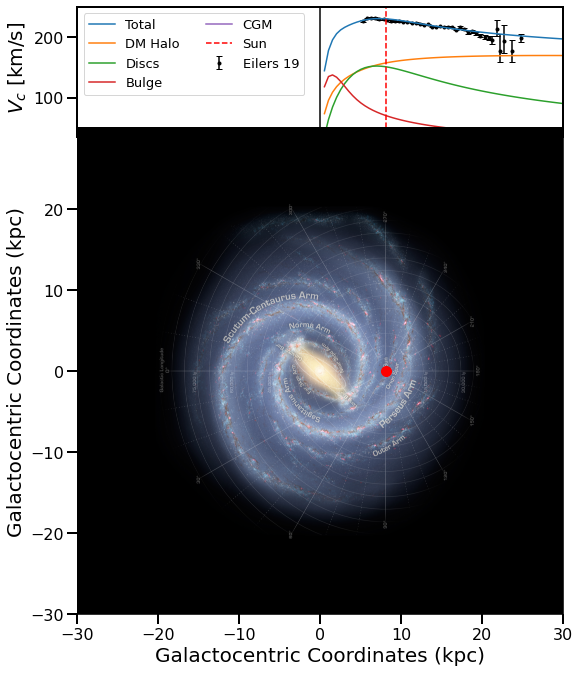

In [8]:
thesis_plots.combined_milkiway_plot()
plt.savefig('../figures/rot_curve_mw.pdf', dpi=200,  bbox_inches="tight")